Text(0, 0.5, 'PD current [A]')

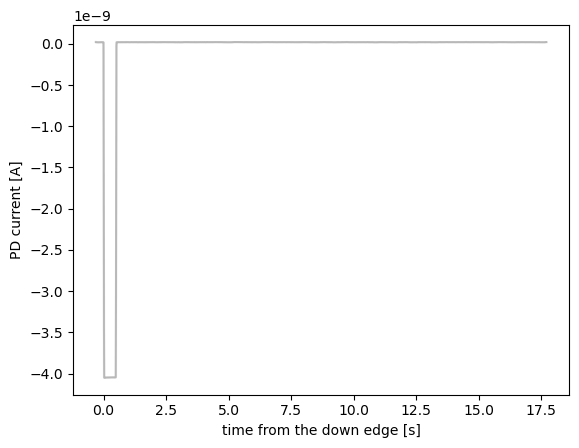

In [2]:
from lsst.daf.butler import Butler
import pylab
import numpy

repo_path = "embargo_new"
butler = Butler(repo_path,collections=['LSSTCam/photodiode','LSSTCam/raw/all'],instrument='LSSTCam')
registry = butler.registry

where = "exposure.science_program = 'E886'"
refs = list(set(butler.registry.queryDatasets('photodiode', where=where)))
for ref in refs:
    pd_data = butler.get(ref)
    max(pd_data.currentSamples)
    start= numpy.argmin(numpy.diff(pd_data.currentSamples))
    pylab.plot(pd_data.timeSamples-start*0.0167,pd_data.currentSamples,alpha=0.1,color="k")
pylab.xlabel("time from the down edge [s]")
pylab.ylabel("PD current [A]")